In [2]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#Load and Preview the Dataset

# Load the JSON file
file_path = r"C:\Users\cherr\OneDrive\Desktop\FALL 2024\OR\Project\Red_Raider.json"
with open(file_path, 'r') as file:
    dataset = json.load(file)

# Print the first 25 entries in the dataset for verification
print("Preview of the first 25 entries in the dataset:")
print(dataset[:25])

Preview of the first 25 entries in the dataset:
[{'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['AB']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'O', 'Donor': ['AB', 'A', 'B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['B']}, {'Recipient': 'B', 'Donor': ['A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'A', 'B']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recip

In [4]:
#Create Directed Graph

# Initialize a directed graph
graph = nx.DiGraph()

# Add nodes to the graph with attributes from the dataset
node_counter = 0
for record in dataset:
    graph.add_node(node_counter, **record)
    node_counter += 1

# Compatibility rules for donor and recipient blood types
blood_compatibility = {
    'O': ['O', 'A', 'B', 'AB'],
    'A': ['A', 'AB'],
    'B': ['B', 'AB'],
    'AB': ['AB']
}

# Add edges to the graph based on compatibility rules
for node_u in graph.nodes:
    donors = graph.nodes[node_u]['Donor']
    for donor_blood in donors:
        for node_v in graph.nodes:
            if node_u == node_v:  # Avoid self-loops
                continue
            recipient_blood = graph.nodes[node_v]['Recipient']
            if recipient_blood in blood_compatibility[donor_blood]:
                graph.add_edge(node_u, node_v)

#Print the resulting edges
print("Edges in the graph:", list(graph.edges))

Edges in the graph: [(1, 0), (1, 2), (1, 3), (1, 6), (1, 9), (1, 11), (1, 14), (1, 18), (1, 19), (1, 22), (1, 24), (1, 28), (1, 29), (1, 33), (1, 34), (1, 36), (1, 37), (1, 39), (1, 41), (1, 42), (1, 46), (1, 47), (1, 48), (1, 49), (1, 56), (1, 58), (1, 60), (1, 63), (1, 65), (1, 70), (1, 71), (1, 74), (1, 77), (1, 78), (1, 79), (1, 82), (1, 94), (1, 96), (1, 98), (1, 100), (1, 102), (1, 105), (1, 107), (1, 111), (1, 113), (1, 119), (1, 120), (1, 121), (1, 124), (1, 128), (1, 132), (1, 133), (1, 134), (1, 135), (1, 136), (1, 139), (1, 141), (1, 142), (1, 143), (1, 145), (1, 148), (1, 152), (1, 153), (1, 155), (1, 160), (1, 163), (1, 170), (1, 171), (1, 172), (1, 174), (1, 175), (1, 177), (1, 178), (1, 184), (1, 185), (1, 186), (1, 191), (1, 193), (1, 194), (1, 195), (1, 202), (1, 206), (1, 207), (1, 209), (1, 210), (1, 211), (1, 213), (1, 218), (1, 220), (1, 222), (1, 223), (1, 225), (1, 226), (1, 230), (1, 233), (1, 234), (1, 237), (1, 239), (1, 240), (1, 245), (1, 246), (1, 249), (1,

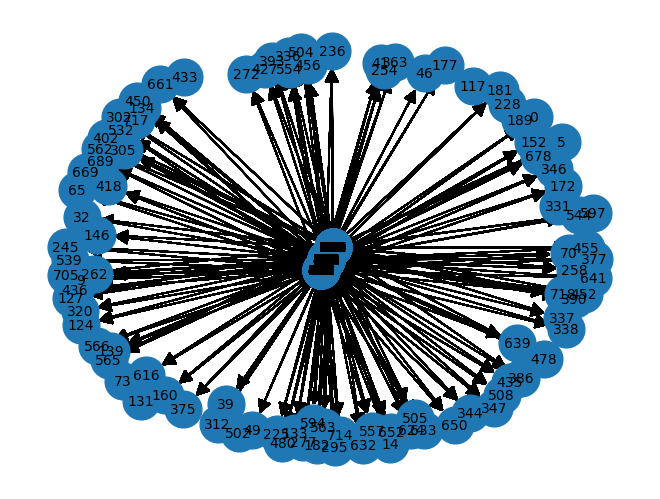

In [14]:
#Visualizing the Data using Matplotlib

import matplotlib.pyplot as plt

#Using the spring layout visualizing the whole data
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=700, font_size=10, arrowsize=20)

#plotting the graph
plt.show()


In [6]:
# Find Directed Cycles of Length 2

# Initialize list for cycles of length 2
two_node_cycles = []

# Mark all edges as unvisited initially
for edge in graph.edges:
    graph.edges[edge]["visited"] = False

# Iterate over edges to find pairs forming cycles
for source, target in graph.edges:
    if graph.edges[(source, target)]["visited"]:
        continue
    if (target, source) in graph.edges:
        two_node_cycles.append((
            graph.nodes[source]["Recipient"], 
            graph.nodes[target]["Donor"]
        ))
        graph.edges[(target, source)]["visited"] = True  # Mark reverse edge as visited

# Output the number of cycles of length 2
print("Number of cycles of length 2:", len(two_node_cycles))
print("Directed cycles of length 2:", two_node_cycles)

Number of cycles of length 2: 44940
Directed cycles of length 2: [('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['A']), ('A', ['AB', 'A']), ('A', ['A']), ('A', ['A']), ('A', ['A']), ('A', ['A']), ('A', ['AB', 'A']), ('A', ['A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['A']), ('A', ['AB', 'A']), ('A', ['A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['AB', 'A']), ('A', ['A']), ('A', ['AB', 'A']), ('A', ['A']), ('A', ['AB', 'A']), ('A'

In [6]:
# Find Directed Cycles of Length 3
three_node_cycles = []

# Iterate over all edges to find potential cycles of length 3
for source, target in graph.edges:
    for successor in graph.successors(target):
        if successor != source and (successor, source) in graph.edges:
            three_node_cycles.append((
                graph.nodes[source]["Recipient"], 
                graph.nodes[target]["Donor"], 
                graph.nodes[successor]["Recipient"]
            ))

# Remove duplicates from the cycles
unique_three_node_cycles = list(set(tuple(cycle) for cycle in three_node_cycles))

# Output the number and details of cycles
print(f"Number of directed cycles of length 3: {len(unique_three_node_cycles)}")
print("Directed cycles of length 3:", unique_three_node_cycles)

Number of directed cycles of length 3: 0
Directed cycles of length 3: []


In [7]:
# Find Maximum Matching Using Gurobi

import gurobipy as gp
from gurobipy import GRB

# Create model object
model = gp.Model()

# Create variable for each edge (donor-recipient relationship)
edge_variables = model.addVars(graph.edges, vtype=GRB.BINARY)

# Objective function: maximize number of edges (matches)
model.setObjective(gp.quicksum(edge_variables[edge] for edge in graph.edges), GRB.MAXIMIZE)

# Add Constraints

# The number of incoming edges to each vertex (recipient) is at most one
model.addConstrs(gp.quicksum(edge_variables[(donor, recipient)] for donor in graph.neighbors(recipient) if (donor, recipient) in graph.edges) <= 1 
                 for recipient in graph.nodes)

# The number of incoming edges should be equal to the number of outgoing edges for each vertex
model.addConstrs(gp.quicksum(edge_variables[(donor, recipient)] for donor in graph.neighbors(recipient) if (donor, recipient) in graph.edges) == 
                 gp.quicksum(edge_variables[(recipient, donor)] for donor in graph.neighbors(recipient) if (recipient, donor) in graph.edges) 
                 for recipient in graph.nodes)

#Solve the Optimization Problem
model.optimize()


Set parameter Username
Academic license - for non-commercial use only - expires 2025-11-10
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: AMD Ryzen 5 5600H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1480 rows, 193618 columns and 373378 nonzeros
Model fingerprint: 0xbc5b82ce
Variable types: 0 continuous, 193618 integer (193618 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 632 rows and 102890 columns
Presolve time: 1.13s
Presolved: 848 rows, 90728 columns, 181032 nonzeros
Variable types: 0 continuous, 90728 integer (90728 binary)

Root relaxation: objective 4.200000e+02, 2588 iterations, 0.55 seconds (0.27 work units)

    Nodes    |    Current Node    |     Objective Bound

In [14]:
# Output Results of the objective value

if model.status == GRB.OPTIMAL:
    print("Optimal solution found:")
    selected_edges = [edge for edge in graph.edges if edge_variables[edge].x > 0.5]
    print("length of (Edges):", len(selected_edges))
    print("Selected Matches (Edges):", selected_edges) 
else:
    print("No optimal solution found.")

Optimal solution found:
length of (Edges): 420
Selected Matches (Edges): [(1, 213), (2, 150), (3, 17), (6, 736), (7, 658), (8, 448), (11, 638), (13, 240), (15, 477), (16, 298), (17, 449), (18, 271), (19, 727), (21, 223), (22, 725), (23, 253), (24, 416), (25, 737), (26, 479), (27, 463), (28, 97), (29, 687), (31, 439), (33, 711), (34, 106), (36, 229), (37, 733), (42, 1), (44, 647), (47, 653), (48, 276), (54, 590), (56, 197), (57, 511), (58, 8), (60, 64), (62, 668), (63, 679), (64, 713), (66, 58), (69, 174), (71, 327), (76, 341), (77, 682), (78, 651), (79, 401), (82, 129), (83, 77), (84, 571), (85, 148), (86, 558), (88, 145), (89, 339), (90, 22), (92, 457), (93, 470), (94, 465), (96, 212), (97, 636), (98, 704), (99, 587), (100, 235), (101, 286), (102, 114), (103, 360), (104, 703), (105, 441), (106, 700), (107, 628), (108, 735), (111, 567), (113, 520), (114, 374), (116, 698), (118, 694), (119, 342), (120, 429), (121, 576), (123, 693), (128, 723), (129, 721), (132, 27), (135, 88), (136, 101

In [8]:
# Print the objective value (maximum number of selected edges)

print("Objective:", model.objVal)

# Select the edges where the binary variable value is greater than 0.5 (i.e., the edge is part of the matching)

selected_edges = [edge for edge in graph.edges if edge_variables[edge].X > 0.5]


Objective: 420.0


In [10]:
# Checking the compatability percentage of each node.

# Compatibility dictionary

donor_recipient_compatibility = {'O': ['O', 'A', 'B', 'AB'],
                                 'A': ['A', 'AB'],
                                 'B': ['B', 'AB'],
                                 'AB': ['AB']}

# Create a dictionary to store the compatibility percentages for each node
compatibility_percentages = {}

# Iterate through each node
for node in graph.nodes:
    # Get the donor and recipient of the current node
    donors = graph.nodes[node]['Donor']
    recipient = graph.nodes[node]['Recipient']
    
    # Initialize the count of compatible recipients
    compatible_count = 0
    total_comparisons = 0
    
    # Compare with all other nodes
    for other_node in graph.nodes:
        if node == other_node:
            continue
        
        # Get the recipient of the other node
        other_recipient = graph.nodes[other_node]['Recipient']
        
        # Check compatibility between the donor and the recipient of the other node
        for donor in donors:
            if other_recipient in donor_recipient_compatibility[donor]:
                compatible_count += 1
            total_comparisons += 1
    
    # Calculate the compatibility percentage for the node
    if total_comparisons > 0:
        compatibility_percentage = (compatible_count / total_comparisons) * 100
    else:
        compatibility_percentage = 0
    
    # Store the compatibility percentage for the node
    compatibility_percentages[node] = compatibility_percentage

# Print compatibility percentages for each node
for node, percentage in compatibility_percentages.items():
    print(f"Node {node} has {percentage:.2f}% compatibility with other nodes.")


Node 0 has 0.00% compatibility with other nodes.
Node 1 has 17.86% compatibility with other nodes.
Node 2 has 16.71% compatibility with other nodes.
Node 3 has 16.71% compatibility with other nodes.
Node 4 has 16.71% compatibility with other nodes.
Node 5 has 0.00% compatibility with other nodes.
Node 6 has 16.71% compatibility with other nodes.
Node 7 has 17.86% compatibility with other nodes.
Node 8 has 17.86% compatibility with other nodes.
Node 9 has 0.00% compatibility with other nodes.
Node 10 has 23.05% compatibility with other nodes.
Node 11 has 16.71% compatibility with other nodes.
Node 12 has 16.71% compatibility with other nodes.
Node 13 has 17.86% compatibility with other nodes.
Node 14 has 0.00% compatibility with other nodes.
Node 15 has 17.86% compatibility with other nodes.
Node 16 has 17.86% compatibility with other nodes.
Node 17 has 35.72% compatibility with other nodes.
Node 18 has 33.42% compatibility with other nodes.
Node 19 has 16.71% compatibility with other n

In [12]:
# Print compatibility percentages for all nodes in Descending Order.

for node_data in sorted_compatibility:
    print(f"Node {node_data['node']} - Compatibility: {node_data['compatibility_percentage']:.2f}%")
    print(f"   Recipient: {node_data['recipient']}")
    print(f"   Donors: {', '.join(node_data['donors'])}")


Node 17 - Compatibility: 35.72%
   Recipient: A
   Donors: B
Node 31 - Compatibility: 35.72%
   Recipient: A
   Donors: B
Node 54 - Compatibility: 35.72%
   Recipient: A
   Donors: B
Node 83 - Compatibility: 35.72%
   Recipient: A
   Donors: B
Node 88 - Compatibility: 35.72%
   Recipient: A
   Donors: B
Node 93 - Compatibility: 35.72%
   Recipient: A
   Donors: B
Node 99 - Compatibility: 35.72%
   Recipient: A
   Donors: B
Node 101 - Compatibility: 35.72%
   Recipient: A
   Donors: B
Node 103 - Compatibility: 35.72%
   Recipient: A
   Donors: B
Node 144 - Compatibility: 35.72%
   Recipient: A
   Donors: B
Node 154 - Compatibility: 35.72%
   Recipient: A
   Donors: B
Node 156 - Compatibility: 35.72%
   Recipient: A
   Donors: B
Node 161 - Compatibility: 35.72%
   Recipient: A
   Donors: B
Node 165 - Compatibility: 35.72%
   Recipient: A
   Donors: B
Node 221 - Compatibility: 35.72%
   Recipient: A
   Donors: B
Node 232 - Compatibility: 35.72%
   Recipient: A
   Donors: B
Node 244 - Comp

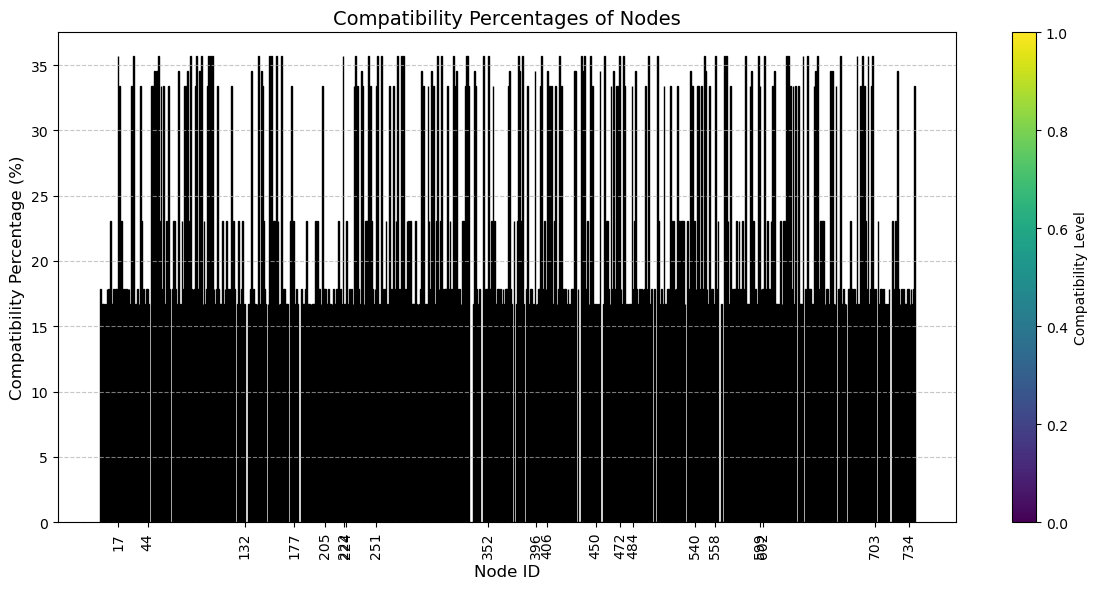

In [13]:
#visualizing the Comapatability percentage of each node

import matplotlib.pyplot as plt
import numpy as np

# Prepare data for the graph
nodes = [node_data['node'] for node_data in sorted_compatibility]
percentages = [node_data['compatibility_percentage'] for node_data in sorted_compatibility]

# Create the bar graph
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(nodes)))  # Use a colormap for bar colors

plt.bar(nodes, percentages, color=colors, edgecolor="black")
plt.xlabel('Node ID', fontsize=12)
plt.ylabel('Compatibility Percentage (%)', fontsize=12)
plt.title('Compatibility Percentages of Nodes', fontsize=14)
plt.xticks(nodes[::max(1, len(nodes)//20)], rotation=90)  # Show every 20th node for readability
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label="Compatibility Level")

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the graph
plt.tight_layout()
plt.show()


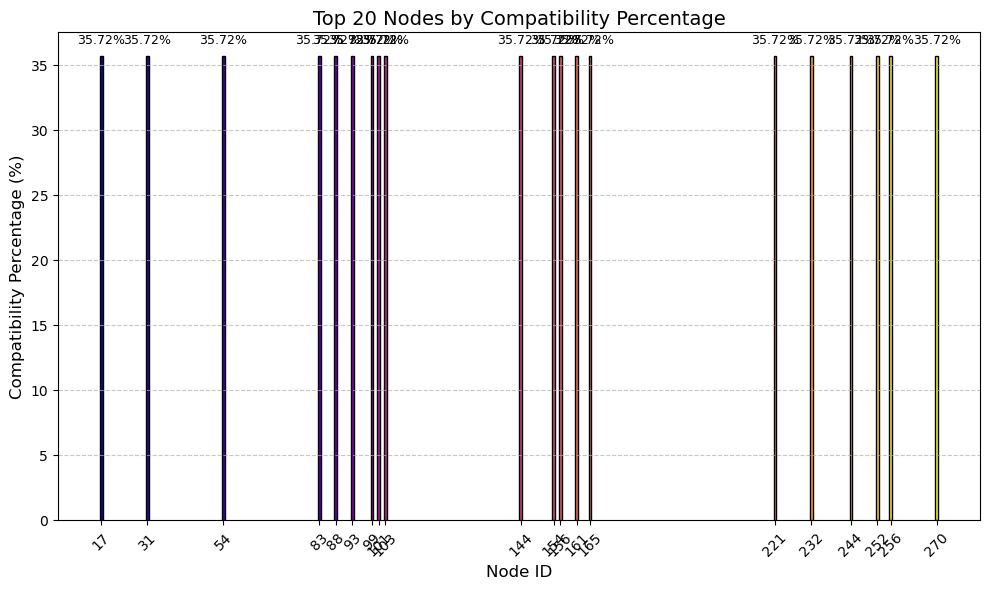

In [14]:
#Visualizing the Top 20 Nodes 

import matplotlib.pyplot as plt
import numpy as np

# Prepare data for the top 20 nodes
top_20_nodes = sorted_compatibility[:20]  # Extract top 20 nodes
node_ids = [node_data['node'] for node_data in top_20_nodes]
compatibility_percentages = [node_data['compatibility_percentage'] for node_data in top_20_nodes]

# Create a bar graph
plt.figure(figsize=(10, 6))
colors = plt.cm.plasma(np.linspace(0, 1, len(node_ids)))  # Use a colormap for vibrant bar colors

plt.bar(node_ids, compatibility_percentages, color=colors, edgecolor="black")
plt.xlabel('Node ID', fontsize=12)
plt.ylabel('Compatibility Percentage (%)', fontsize=12)
plt.title('Top 20 Nodes by Compatibility Percentage', fontsize=14)
plt.xticks(node_ids, rotation=45)  # Rotate x-axis labels for better readability

# Annotate each bar with its percentage
for i, percentage in enumerate(compatibility_percentages):
    plt.text(node_ids[i], percentage + 1, f"{percentage:.2f}%", ha='center', fontsize=9)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the graph
plt.tight_layout()
plt.show()


In [27]:
#Getting the count of all the pairs

# Example compatibility rules
donor_recipient_compatibility = {
    'O': ['O', 'A', 'B', 'AB'],
    'A': ['A', 'AB'],
    'B': ['B', 'AB'],
    'AB': ['AB']
}

# Data
data = dataset

# Initialize a dictionary to hold the total count of pairs for each donor-recipient combination
compatibility_counts = {}

# Iterate through each data entry to count donor-recipient pairs
for entry in data:
    donors = entry['Donor']  # Get the donor(s)
    recipient = entry['Recipient']  # Get the recipient
    
    for donor in donors:
        # Check if the donor-recipient combination is compatible based on the rules
        if recipient in donor_recipient_compatibility[donor]:
            # If compatible, increment the total count of pairs for this combination
            if (donor, recipient) not in compatibility_counts:
                compatibility_counts[(donor, recipient)] = {'count': 0}
            compatibility_counts[(donor, recipient)]['count'] += 1
        else:
            # If not compatible, still count the pair but no increment for compatibility
            if (donor, recipient) not in compatibility_counts:
                compatibility_counts[(donor, recipient)] = {'count': 0}
            compatibility_counts[(donor, recipient)]['count'] += 1

# Print the total number of pairs for each donor-recipient combination
for (donor, recipient), counts in compatibility_counts.items():
    print(f"Donor: {donor}, Recipient: {recipient}, Total Pairs: {counts['count']}")


Donor: AB, Recipient: B, Total Pairs: 202
Donor: AB, Recipient: A, Total Pairs: 196
Donor: B, Recipient: A, Total Pairs: 210
Donor: A, Recipient: B, Total Pairs: 214
Donor: AB, Recipient: O, Total Pairs: 182
Donor: A, Recipient: O, Total Pairs: 168
Donor: B, Recipient: O, Total Pairs: 166
